In [107]:
from benford.benford import(
    barplot,
    distribution_plot,
    frequency_table,
    chi_squared_passed,
    chi_squared_statistic,
    kolmogorov_smirnov_passed,
    nth_significant_digit, 
    significant
)
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
from random import sample as random_sample
from math import log
plt.rcParams['figure.figsize'] = [12, 6]

## Skaleninvarianz

In [89]:
sample = random.default_rng().uniform(0,1,1000)
sample = 10**sample

In [90]:
frequency_table(sample)

benford  sample_data
digit                        
1      30.103000         30.3
2      17.609126         17.5
3      12.493874         12.3
4       9.691001         10.5
5       7.918125          9.0
6       6.694679          6.7
7       5.799195          5.0
8       5.115252          5.0
9       4.575749          3.7

In [91]:
sample_scaled = 4*sample

In [92]:
frequency_table(sample_scaled)

benford  sample_data
digit                        
1      30.103000         30.0
2      17.609126         18.0
3      12.493874         11.4
4       9.691001          9.1
5       7.918125          9.2
6       6.694679          5.7
7       5.799195          6.3
8       5.115252          6.0
9       4.575749          4.3

In [93]:
chi_squared_passed(sample_multiplied)

True

In [94]:
kolmogorov_smirnov_passed(sample_multiplied)

True

## Baseninvarianz

In [95]:
sample_base = sample**9

In [96]:
frequency_table(sample_base)

benford  sample_data
digit                        
1      30.103000         29.7
2      17.609126         19.5
3      12.493874         12.5
4       9.691001          9.5
5       7.918125          6.9
6       6.694679          7.1
7       5.799195          5.6
8       5.115252          4.6
9       4.575749          4.6

In [97]:
chi_squared_passed(sample_base)

True

In [98]:
chi_squared_statistic(sample_base)

4.265282225134497

In [99]:
kolmogorov_smirnov_passed(sample_base)

True

## Summeninvarianz

In [111]:
df = pd.DataFrame(
    zip(
        sample,
        [nth_significant_digit(x) for x in sample],
        [significant(x) for x in sample]
    ),
    columns=['value', 'digit', 'significant']
)

<AxesSubplot:>

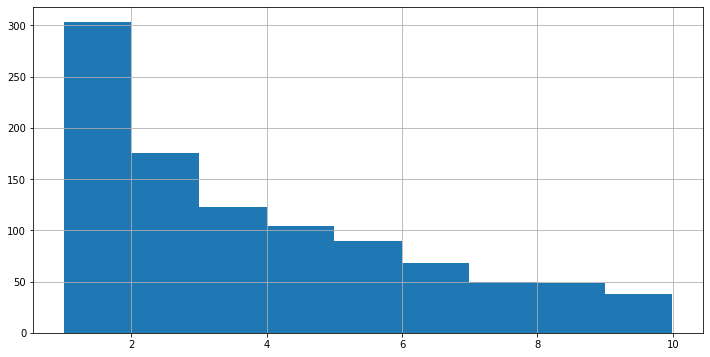

In [109]:
df.value.hist(bins=9, )

In [112]:
df.groupby('digit')['value', 'significant'].sum()

<ipython-input-112-caa2b95ff420>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('digit')['value', 'significant'].sum()


value  significant
digit                         
1      436.126132   436.126132
2      425.817139   425.817139
3      427.083219   427.083219
4      470.425852   470.425852
5      492.095514   492.095514
6      432.507899   432.507899
7      376.693753   376.693753
8      423.796354   423.796354
9      351.049869   351.049869

In [113]:
df

value  digit  significant
0    8.696864      8     8.696864
1    1.387028      1     1.387028
2    1.342277      1     1.342277
3    2.752908      2     2.752908
4    8.747312      8     8.747312
..        ...    ...          ...
995  9.551888      9     9.551888
996  2.810630      2     2.810630
997  4.699430      4     4.699430
998  2.198510      2     2.198510
999  2.774567      2     2.774567

[1000 rows x 3 columns]

In [104]:
table = frequency_table(sample)

In [105]:
t = table.cumsum()

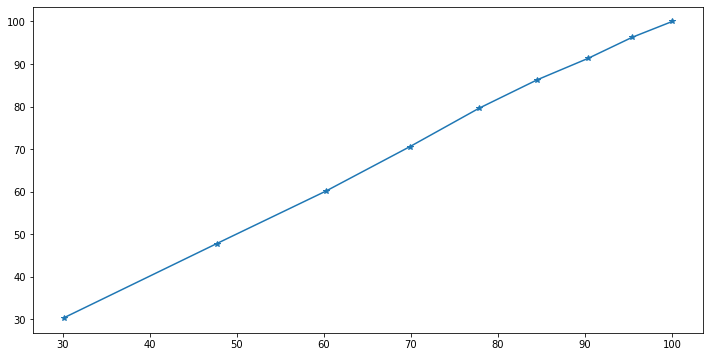

In [106]:
plt.plot(t.benford,t.sample_data, marker='*')